In [1]:
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

### tissue info

In [2]:
sdrf = pd.read_table("/home1/wangd/project/PXD010154/PXD010154.sdrf.tsv")

In [3]:
sdrf["reference_file_name"] = sdrf['comment[data file]'].str.split(".", expand=True)[0]
file_tissue_map = sdrf[["characteristics[organism part]","reference_file_name"]].set_index('reference_file_name').to_dict()

In [4]:
tissue_sample = sdrf[["characteristics[organism part]","source name"]].drop_duplicates()
tissue_sample_map = tissue_sample["characteristics[organism part]"].value_counts()

### Common function

In [5]:
def distribution_plot(dataframe,save_res):
    dataframe["organism part"] = dataframe["reference_file_name"].map(file_tissue_map["characteristics[organism part]"])
    dataframe["sample_nums"] = dataframe["organism part"].map(tissue_sample_map)

    value_counts = dataframe['organism part'].value_counts()
    unique_keys = value_counts.index.tolist()
    nums_list = [tissue_sample_map.get(key, "") for key in unique_keys]
    
    ax = value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    
    plt.xlabel('Tissue', fontsize=14)
    plt.ylabel('Number of PSMs', fontsize=14)
    plt.grid(False)
    
    for p,nums in zip(ax.patches, nums_list):
        ax.annotate(nums, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    plt.savefig(save_res, format='svg', transparent=True, bbox_inches='tight')
    plt.show()


### from parquet

In [6]:
parq_file = "/home1/wangd/project/PXD010154/PXD010154-1de73bcb-ee3e-4d19-9d8d-da72f11d5fac.psm.parquet"
table = pq.read_table(parq_file)
from_parquet = table.to_pandas()

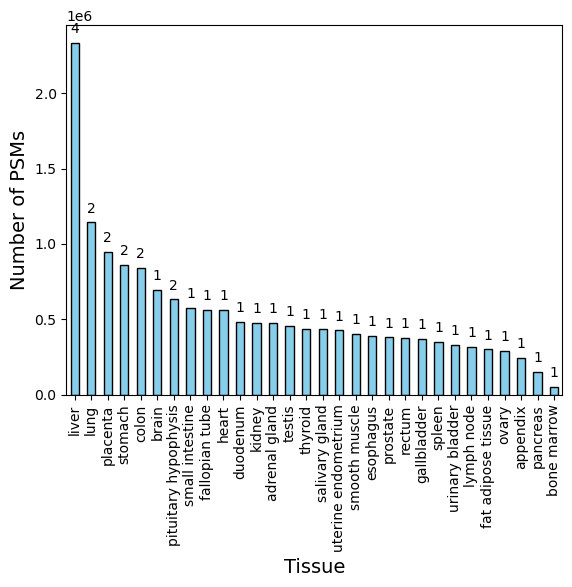

In [7]:
distribution_plot(from_parquet,"tissue_distribution_from_parquet.svg")

### final result

In [8]:
final_res = pd.read_table("/home1/wangd/project/PXD010154/GCA_blast/PXD010154-1de73bcb-ee3e-4d19-9d8d-da72f11d5fac.psm.parquet/gca_peptides_for_deeplc_95thperc_observations_ms2pip_by_filtered.tsv")

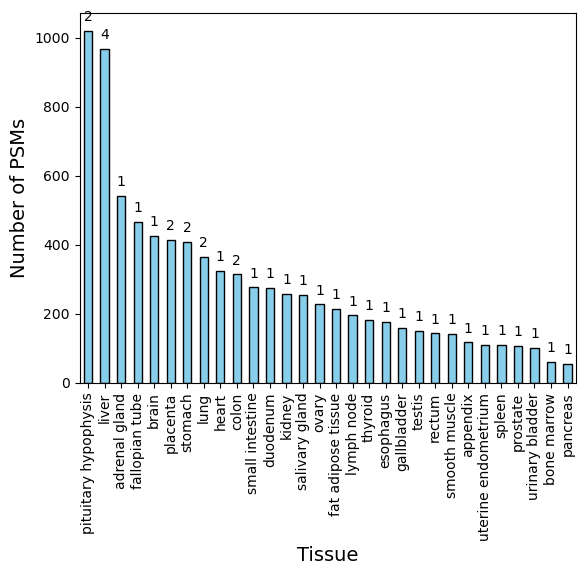

In [9]:
distribution_plot(final_res,"tissue_distribution_from_final_res.svg")

In [10]:
tissue_sample_map

liver                   4
colon                   2
lung                    2
stomach                 2
placenta                2
pituitary hypophysis    2
duodenum                1
brain                   1
esophagus               1
fallopian tube          1
gallbladder             1
bone marrow             1
appendix                1
adrenal gland           1
heart                   1
kidney                  1
fat adipose tissue      1
ovary                   1
pancreas                1
prostate                1
rectum                  1
lymph node              1
salivary gland          1
small intestine         1
smooth muscle           1
spleen                  1
testis                  1
thyroid                 1
urinary bladder         1
uterine endometrium     1
Name: characteristics[organism part], dtype: int64